In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Getting Image
img = cv2.imread("DATA//00-puppy.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [12]:
# Converting to HSV
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Converting to HLS
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

#plt.imshow(img)

In [18]:
# Blending Images
img = cv2.imread("DATA//dog_backpack.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

# note that the images are not the same size!
img.shape
img2.shape

(1280, 1277, 3)

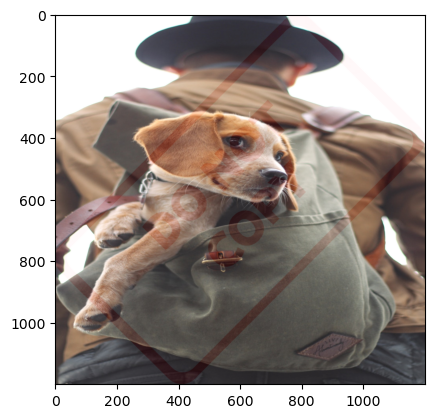

In [35]:
# Blending images of the same size
img = cv2.resize(img, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

blended = cv2.addWeighted(src1=img, alpha=1, src2=img2, beta=0.1, gamma=0) 
# alpha, beta and gamma are constants <1 that computes the value of the new pixel for the new image.
# new_pixel = alpha* pixel from source1) + beta*(pixel from source2) + gamma
plt.imshow(blended)

In [41]:
# Overlaying images
img = cv2.imread("DATA//dog_backpack.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

largeImage = img
smallImage = cv2.resize(img2, (600,600))

x_offset = 0
y_offset = 0

x_end = x_offset+smallImage.shape[1] # numpy thinks that the vertical axis as the x axis.
y_end = y_offset+smallImage.shape[0] # the horizontal axis is the y axis.

largeImage[y_offset:y_end, x_offset:x_end] = smallImage # laying the small image on top of the larger image - "replacing the pixels in the numpy array"

# plt.imshow(largeImage)

# This leads to blending with images of different sizes as well as masking.

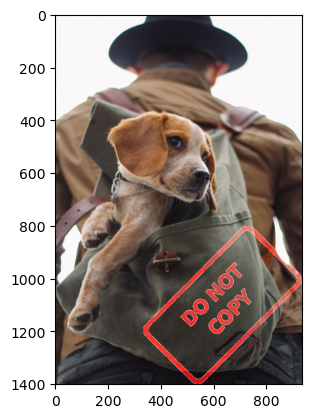

In [110]:
# Masking Images
img1 = cv2.imread("DATA//dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 

img2 = cv2.resize(img2, (600,600))

# Region of Interest (ROI) (Bottom right corner)
x_offset = img1.shape[1] - img2.shape[1]
y_offset = img1.shape[0] - img2.shape[0] 

roi = img1[y_offset:img1.shape[0], x_offset:img1.shape[1]]

# Creating a Mask
mask = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
mask_inv = cv2.bitwise_not(mask) # inverse colors
# plt.imshow(mask_inv, cmap="gray")

# cv2 will remove all other color channels - this means we need to add them back to make it compatible with other functions!

# Convert Mask to have 3 channels
white_background = np.full(img2.shape, 255, dtype=np.uint8) # create a white background with the same size of shape of the mask.

# converting inverse mask to have 3 color channels
background = cv2.bitwise_or(white_background, white_background, mask=mask_inv) 
#plt.imshow(background)

# apply the color of the original to the mask
foreground = cv2.bitwise_or(img2, img2, mask=mask_inv)
#plt.imshow(foreground)

final_roi = cv2.bitwise_or(roi, foreground) # merge both the foreground and the roi
#plt.imshow(final_roi)

img1[y_offset:y_offset+roi.shape[0], x_offset:x_offset+roi.shape[1]] = final_roi
plt.imshow(img1)


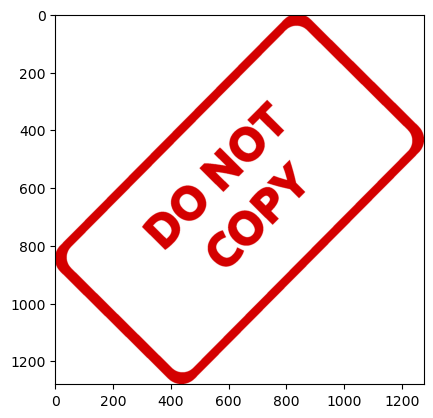

In [112]:
img1 = cv2.imread("DATA//dog_backpack.png")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("DATA//watermark_no_copy.png") 
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
plt.imshow(img2)